# San Francisco Crime Classification
*Predict the category of crimes that occurred in the city by the bay*

[Kaggle Project Link](https://www.kaggle.com/c/sf-crime)

From 1934 to 1963, San Francisco was infamous for housing some of the world's most notorious criminals on the inescapable island of Alcatraz.

Today, the city is known more for its tech scene than its criminal past. But, with rising wealth inequality, housing shortages, and a proliferation of expensive digital toys riding BART to work, there is no scarcity of crime in the city by the bay.

From Sunset to SOMA, and Marina to Excelsior, this competition's dataset provides nearly 12 years of crime reports from across all of San Francisco's neighborhoods. Given time and location, you must predict the category of crime that occurred.

We're also encouraging you to explore the dataset visually. What can we learn about the city through visualizations like this Top Crimes Map? The top most up-voted scripts from this competition will receive official Kaggle swag as prizes.

### Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm
import seaborn as sns
from IPython.display import display
import toolz as t
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing
from sklearn import metrics
import random
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.datasets import make_gaussian_quantiles
from IPython.core.display import Image, display
from sklearn.externals.six import StringIO
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import log_loss
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB

import warnings
warnings.filterwarnings("ignore")

C:\Users\sconner\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# For reviewing purposes
def return_all_rows(x):
    pd.set_option('display.max_rows', len(x))
    return x
    pd.reset_option('display.max_rows')
    
def return_all_columns(x):
    pd.set_option('display.max_columns', len(x))
    return x.head(5)
    pd.reset_option('display.max_columns')

# Exploratory Data Analysis

In [3]:
# Train/Test - Load

# Load training data
train = pd.read_csv('C:/Users/sconner/Desktop/W207/W207_Final/data/train.csv.zip', parse_dates=['Dates'])

# Load test data
test = pd.read_csv('C:/Users/sconner/Desktop/W207/W207_Final/data/test.csv.zip', parse_dates=['Dates'])

In [4]:
# Train - Exploratory - Review Dataset
train

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541
5,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Wednesday,INGLESIDE,NONE,0 Block of TEDDY AV,-122.403252,37.713431
6,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,INGLESIDE,NONE,AVALON AV / PERU AV,-122.423327,37.725138
7,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,BAYVIEW,NONE,KIRKWOOD AV / DONAHUE ST,-122.371274,37.727564
8,2015-05-13 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,RICHMOND,NONE,600 Block of 47TH AV,-122.508194,37.776601
9,2015-05-13 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,CENTRAL,NONE,JEFFERSON ST / LEAVENWORTH ST,-122.419088,37.807802


### Observations

    (1) The 'Dates' column includes too much detail to be useful as a feature as is -- year, month, and time of day all in one column. This column can be subset into three different columns (year, month, and hour) though year likely won't be quite as useful unless we opt to weight more recent results to better incorporate trends. However, the time of year (month) and time of day (hour) will be useful features since certain crimes might be more prevelant based on seasonality and time of day.
    (2) Additionally, there is a 'DayOfWeek' column which includes the day of week (Monday, Tuesday, Wednesday, etc) which is a useful feature for the same reasons as month and time of day.
    (3) The columns 'PdDistrict', 'Address', 'X', and 'Y' all refer to location. This will be beneficial since certain crimes might be more prevelant in certain district. 'X' and 'Y' seem to be coordinates so those could potentially be concatenated and used to generate informative visualizations.
    (4) Furthermore, the 'Address' column seems to be consistently be either listed as a "block" or "corner". Perhaps we can subset this information which will better classify crime based on the type of address information given. (i.e., vandalism will be more likely for an exact address while vehicle theft be more likely for a block).

In [5]:
# Train - Exploratory - Review Feature Characteristics
train.describe(include='all')

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
count,878049,878049,878049,878049,878049,878049,878049,878049.000000,878049.000000
unique,389257,39,879,7,10,17,23228,NaN,NaN
top,2011-01-01 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Friday,SOUTHERN,NONE,800 Block of BRYANT ST,NaN,NaN
freq,185,174900,60022,133734,157182,526790,26533,NaN,NaN
first,2003-01-06 00:01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2015-05-13 23:53:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-122.422616,37.771020
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.030354,0.456893
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-122.513642,37.707879
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-122.432952,37.752427


### Observations

    (1) Due to format, the 'Dates' column is producing non-numeric values since it includes too much information and will need to be parsed accordingly (Dates, Month, Year, and Time of Day).
    (2) There are (39) unique values in 'categories' but (879) unique values in 'Descript', however the 'Descript' column is not appropriate for any feature use and will need to be scraped. The number of unique values will make classification accuracy difficult without substantial amount of data which we don't have in this case with only 878,049 observations and only (6) columns available for feature engineering.
    (3) Only (10) PD districts which we can subset as individual features and should improve the accuracy by incorporating an element of geography.

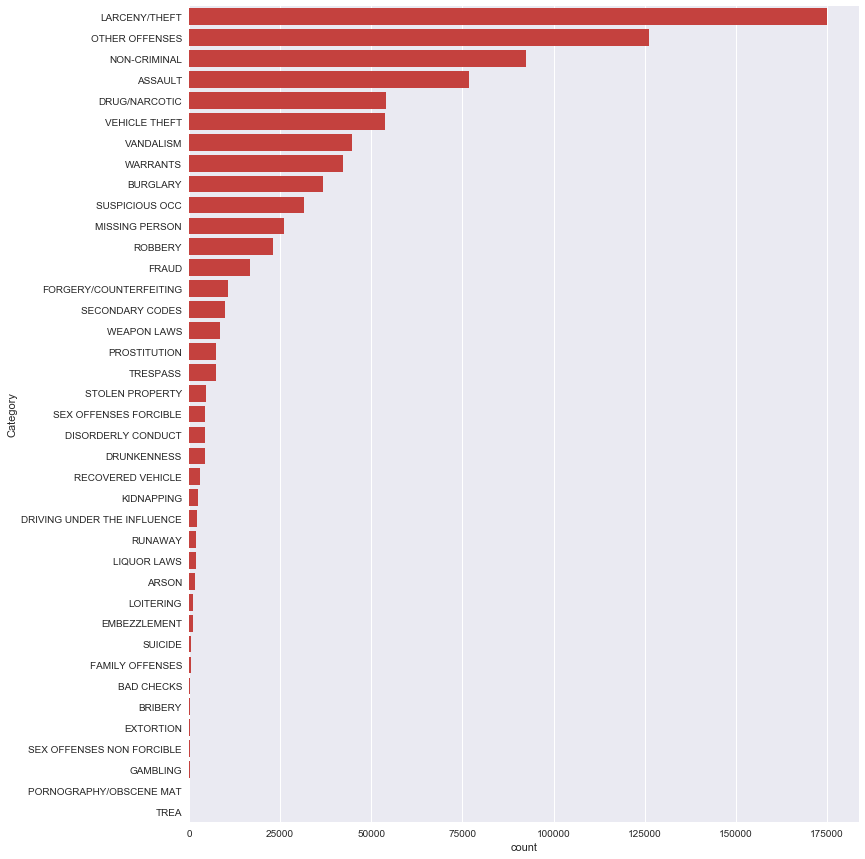

In [6]:
# Train - Exploratory - Review Classification Counts

cyan = ['#1696d2']
lt_grey = ['#d2d2d2']
black = ['#000000']
yellow = ['#fdbf11']
pink = ['#ec008b']
green = ['#55b748']
dk_grey = ['#5c5859']
red = ["#db2b27"]

plt.figure(figsize=(12, 15))
sns.countplot(y=train['Category'], data=train, palette = sns.color_palette(red), order=train.Category.value_counts().index)

# Feature Engineering

### Action

Since we are limited to so few features, we have to make the most of the information we have available. Currently, the 'Dates' column includes too much information which we need to have parsed as individual features (Year, Month, Hour, Minute).

In [7]:
# Clean - Train/Test - Convert to date-time

# Train
train['Dates'] = pd.to_datetime(train['Dates'])
train['Year'] = train['Dates'].dt.year
train['Month'] = train['Dates'].dt.month
train['Hour'] = train['Dates'].dt.hour
train['Minute'] = train['Dates'].dt.minute

# Test
test['Dates'] = pd.to_datetime(test['Dates'])
test['Year'] = test['Dates'].dt.year
test['Month'] = test['Dates'].dt.month
test['Hour'] = test['Dates'].dt.hour
test['Minute'] = test['Dates'].dt.minute 

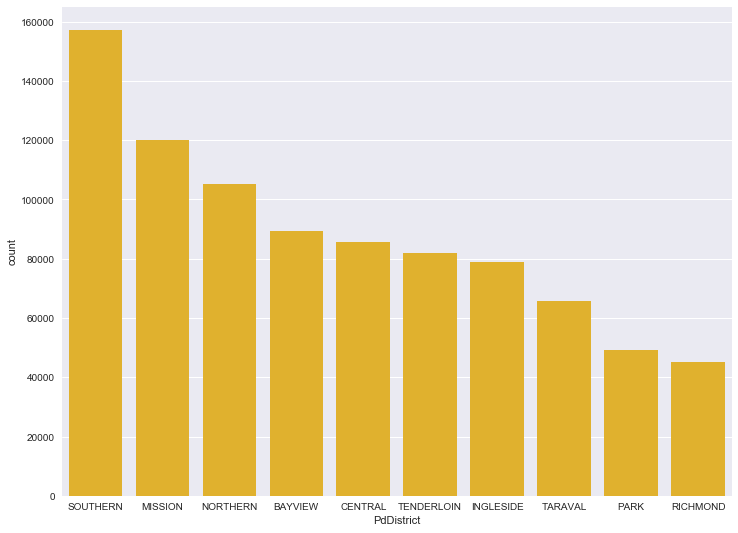

In [8]:
# Train - Exploratory - Review Crime Count By District

plt.figure(figsize=(12, 9))

sns.countplot(x=train['PdDistrict'], data=train, palette = sns.color_palette(yellow), 
              order=train.PdDistrict.value_counts().index)

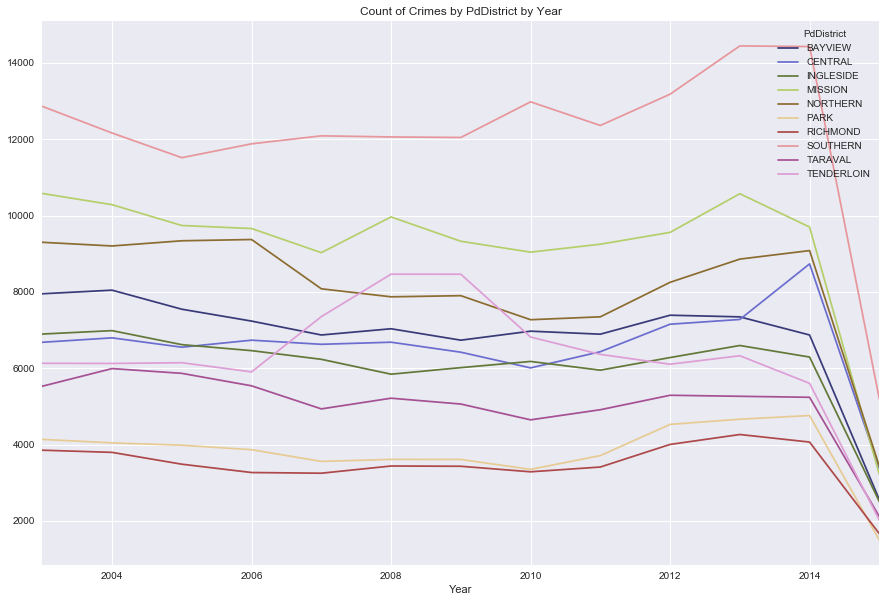

In [9]:
by_district_by_year= train.groupby(['Year', 'PdDistrict']).size().unstack()
plt.figure(figsize=(20, 20))
by_district_by_year.plot(kind='line',figsize=[15,10], colormap='Vega20b')
plt.title("Count of Crimes by PdDistrict by Year")

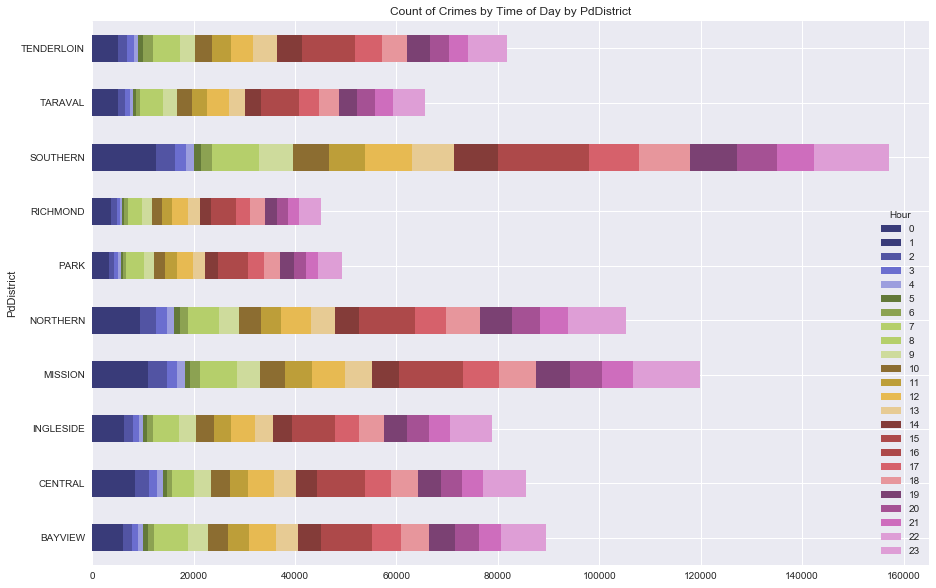

In [10]:
# Train - Exploratory - Review Classification Counts

by_district_by_time = train.groupby(['PdDistrict', 'Hour']).size().unstack()
#plt.figure(figsize=(20, 20))
by_district_by_time.plot(kind='barh', stacked=True, figsize=[15,10], colormap='Vega20b')
plt.title("Count of Crimes by Time of Day by PdDistrict")

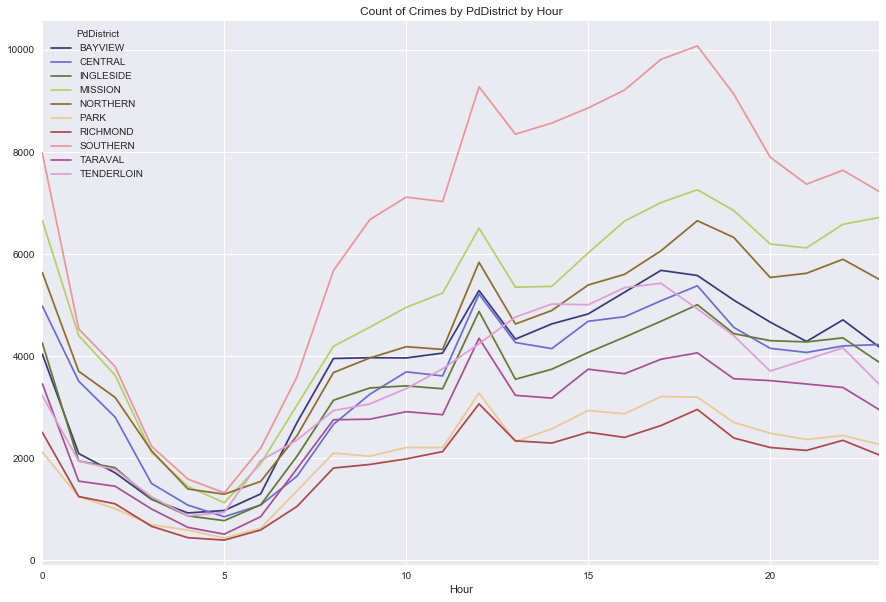

In [11]:
by_district_by_time_2 = train.groupby(['Hour', 'PdDistrict']).size().unstack()
by_district_by_time_2.plot(kind='line',figsize=[15,10], colormap='Vega20b')
plt.title("Count of Crimes by PdDistrict by Hour")

### Action

The problem we're addressing is a classification problem. However, many of the algorithms we will be testing and utilizing cannot accept categorical values as is. Firstly, we must convert our dependent variable ('Category') to integer values.

In [12]:
# Clean - Train - Convert Labels
crimes = preprocessing.LabelEncoder()
labels = crimes.fit_transform(train.Category)

train['labels'] = labels

In [13]:
train

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Year,Month,Hour,Minute,labels
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,23,53,37
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,23,53,21
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,5,23,33,21
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,5,23,30,16
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015,5,23,30,16
5,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Wednesday,INGLESIDE,NONE,0 Block of TEDDY AV,-122.403252,37.713431,2015,5,23,30,16
6,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,INGLESIDE,NONE,AVALON AV / PERU AV,-122.423327,37.725138,2015,5,23,30,36
7,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,BAYVIEW,NONE,KIRKWOOD AV / DONAHUE ST,-122.371274,37.727564,2015,5,23,30,36
8,2015-05-13 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,RICHMOND,NONE,600 Block of 47TH AV,-122.508194,37.776601,2015,5,23,0,16
9,2015-05-13 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,CENTRAL,NONE,JEFFERSON ST / LEAVENWORTH ST,-122.419088,37.807802,2015,5,23,0,16


### Action

It's tempting to apply the same solution to our features (independent variables), however doing so will models to assume there is a numeric relationship between categories in going that route.

A better approach is to convert each unique value within the categorical features into seperate features and have a binary result (0 for false, 1 for true). For example, since there are 12 months there are (12) features added (January-Dec). If an observation contains a value of '4' within the month column it will populate a '1' in the 'Month_4' feature and 0 for all others.

In [14]:
# Enrich - Train/Test - Convert to date-time

# Train
train['Dates'] = pd.to_datetime(train['Dates'])
train['Year'] = train['Dates'].dt.year
train['Month'] = train['Dates'].dt.month
train['Hour'] = train['Dates'].dt.hour
train['Minute'] = train['Dates'].dt.minute

# Test
test['Dates'] = pd.to_datetime(test['Dates'])
test['Year'] = test['Dates'].dt.year
test['Month'] = test['Dates'].dt.month
test['Hour'] = test['Dates'].dt.hour
test['Minute'] = test['Dates'].dt.minute 

In [15]:
# Enrich - Train/Test - Month Dummy Variablees

# Train
months =  pd.get_dummies(train.Month, prefix="month")
train  = pd.concat([train, months], axis=1)

# Test
months =  pd.get_dummies(test.Month, prefix="month")
test  = pd.concat([test, months], axis=1)

In [16]:
# Enrich - Train/Test - Hour Dummy Variablees

# Train
hours =  pd.get_dummies(train.Hour, prefix="hour")
train  = pd.concat([train, hours], axis=1)

# Test
hours =  pd.get_dummies(test.Hour, prefix="hour")
test  = pd.concat([test, hours], axis=1)

In [17]:
# Enrich - Train/Test - Day of Week Dummy Variablees

# Train
days =  pd.get_dummies(train.DayOfWeek)
train  = pd.concat([train, days], axis=1)

# Test
days =  pd.get_dummies(test.DayOfWeek)
test  = pd.concat([test, days], axis=1)

In [18]:
# Enrich - Train/Test - PdDistrict Dummy Variables

# Train
PdDistricts =  pd.get_dummies(train.PdDistrict)
train  = pd.concat([train, PdDistricts], axis=1)

# Test
PdDistricts =  pd.get_dummies(test.PdDistrict)
test  = pd.concat([test, PdDistricts], axis=1)

### Action

Encode X & Y labels

In [19]:
# Clean - Train/Test - Label Encode X & Y

enc = preprocessing.LabelEncoder()

train['X'] = enc.fit_transform(train['X'])
train['Y'] = enc.fit_transform(train['Y'])

test['X'] = enc.fit_transform(test['X'])
test['Y'] = enc.fit_transform(test['Y'])

### Action

Per our earlier observations, each address contains either a "Block" or "Corner" in the description. These can be seperate features with a binary output as well.

In [20]:
# Enrich - Train/Test - Block vs Corner

# Train
train['Address'] = train['Address'].str.lower()
train['Corner'] = train['Address'].apply(lambda x: 1 if "/" in x else 0)
train['Block'] = train['Address'].apply(lambda x: 1 if "block" in x else 0)

# Test
test['Address'] = test['Address'].str.lower()
test['Corner'] = test['Address'].apply(lambda x: 1 if "/" in x else 0)
test['Block'] = test['Address'].apply(lambda x: 1 if "block" in x else 0)

In [21]:
# Train - Exploratory - Review Added Features
return_all_columns(train)

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Year,Month,Hour,Minute,labels,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,BAYVIEW,CENTRAL,INGLESIDE,MISSION,NORTHERN,PARK,RICHMOND,SOUTHERN,TARAVAL,TENDERLOIN,Corner,Block
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",oak st / laguna st,18787,23130,2015,5,23,53,37,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",oak st / laguna st,18787,23130,2015,5,23,53,21,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",vanness av / greenwich st,19317,32784,2015,5,23,33,21,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 block of lombard st,18403,32936,2015,5,23,30,16,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 block of broderick st,13848,21892,2015,5,23,30,16,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1


In [22]:
# Train - Exploratory - Review Feature Characteristics
return_all_rows(train.describe().transpose())

,count,mean,std,min,25%,50%,75%,max
X,878049.0,21190.765004,8413.898274,0.0,16126.0,22874.0,27397.0,34242.0
Y,878049.0,20652.837298,9007.714940,0.0,14908.0,23515.0,27421.0,34242.0
Year,878049.0,2008.712046,3.631194,2003.0,2006.0,2009.0,2012.0,2015.0
Month,878049.0,6.436509,3.428972,1.0,3.0,6.0,9.0,12.0
Hour,878049.0,13.412655,6.549573,0.0,9.0,14.0,19.0,23.0
Minute,878049.0,20.155026,18.594915,0.0,0.0,19.0,33.0,59.0
labels,878049.0,19.338687,10.688637,0.0,16.0,20.0,25.0,38.0
month_1,878049.0,0.083749,0.277012,0.0,0.0,0.0,0.0,1.0
month_2,878049.0,0.080648,0.272294,0.0,0.0,0.0,0.0,1.0
month_3,878049.0,0.086920,0.281718,0.0,0.0,0.0,0.0,1.0


# Model Tests

### Action

First, we want to consolidate an array of our features for later ranking and subsetting.

In [23]:
# train - Filter - Array of our Features

X = [
    'X',
    'Y',
    'month_1',
    'month_2',
    'month_3',
    'month_4',
    'month_5',
    'month_6',
    'month_7',
    'month_8',
    'month_9',
    'month_10',
    'month_11',
    'month_12',
    'hour_0',
    'hour_1',
    'hour_2',
    'hour_3',
    'hour_4',
    'hour_5',
    'hour_6',
    'hour_7',
    'hour_8',
    'hour_9',
    'hour_10',
    'hour_11',
    'hour_12',
    'hour_13',
    'hour_14',
    'hour_15',
    'hour_16',
    'hour_17',
    'hour_18',
    'hour_19',
    'hour_20',
    'hour_21',
    'hour_22',
    'hour_23',
    'Friday',
    'Monday',
    'Saturday',
    'Sunday',
    'Thursday',
    'Tuesday',
    'Wednesday',
    'BAYVIEW',
    'CENTRAL',
    'INGLESIDE',
    'MISSION',
    'NORTHERN',
    'PARK',
    'RICHMOND',
    'SOUTHERN',
    'TARAVAL',
    'TENDERLOIN',
    'Corner',
    'Block'
    ]

### Action

Before testing, we must first split our training data into two subsets -- training and developmental. Before formally applying our model classification predictions we want to vet the best model ahead of time.

Due to the nature of classification models, we will be using a 80/20 training to test data split rather than the typical 70/30. This is because classification models are particularly susceptible to reduced accuracy from fewer observations.

In [24]:
# train - Subset - Relevant features with adequate data
training, dev = train_test_split(train, train_size=0.8)

### Action

Next, we want to rank the features we're using by importance (i.e., model weight). This will be useful in determining the best number of features to use for each machine learning algorithm model

In [25]:
# training - Exploratory - Match and Sort Feature Importance

model = ExtraTreesClassifier()
model.fit(training[X], training['labels'])
feature_weight = list(model.feature_importances_)

length = len(X)

feature_name = []
weight = []

for n in range(length):
    feature_name.append(X[n])
    weight.append(feature_weight[n])
    
feature_rank = pd.DataFrame()
feature_rank['feature'] = feature_name
feature_rank['weight'] = weight

# Sort from largest weight to smallest
feature_rank = feature_rank.sort_values('weight', ascending=0)

feature_rank

,feature,weight
1,Y,0.319487
0,X,0.317379
42,Thursday,0.014438
39,Monday,0.014302
43,Tuesday,0.014251
11,month_10,0.014185
38,Friday,0.014115
6,month_5,0.014031
5,month_4,0.013665
4,month_3,0.013586


In [ ]:
# feature rank - Enrich - Reorder Features by Weight

X = feature_rank['feature']

### Action

Using the training and dev dataframes, we can test classification machine learning algorithms. Additionally, we can find an ideal number of features per each model using the ranking we established earlier.

In [ ]:
# sample_train/sample_dev - Test

# Reduce dataset size for quicker iterations
sample_train, sample_dev = train_test_split(train, train_size=0.7)

log_accuracy = []
log_log_loss = []
bnb_accuracy = []
bnb_log_loss = []
knn_accuracy = []
knn_log_loss = []
rf_accuracy = []
rf_log_loss = []

# sample_train - Split - Reduce Dataset Size

for n in range(length):
    
    X = X[:(n+1)]
    
    print(n+1, "Feature(s)")
    
    # Logistic Regression
    model = LogisticRegression()
    model.fit(sample_train[X], sample_train['labels'])
    prediction = np.array(model.predict_proba(sample_dev[X]))
    accuracy = model.score(sample_dev[X], sample_dev['labels'])
    ll = log_loss(sample_dev['labels'], prediction)
    log_accuracy.append(accuracy)
    log_log_loss.append(ll)
    print("Logistic Regression accuracy:", accuracy)
    print("Logistic Regression log loss:", ll, "\n")
    
    # K-Nearest Neighbors
    model = KNeighborsClassifier()
    model.fit(sample_train[X], sample_train['labels'])
    prediction = np.array(model.predict_proba(sample_dev[X]))
    accuracy = model.score(sample_dev[X], sample_dev['labels'])
    ll = log_loss(sample_dev['labels'], prediction)
    knn_accuracy.append(accuracy)
    knn_log_loss.append(ll)
    print("K-Nearest Neighbors accuracy:", accuracy)
    print("K-Nearest Neighbors log loss:", ll, "\n")
    
    # Bernoulli Naive Bayes
    model = BernoulliNB()
    model.fit(sample_train[X], sample_train['labels'])
    prediction = np.array(model.predict_proba(sample_dev[X]))
    accuracy = model.score(sample_dev[X], sample_dev['labels'])
    ll = log_loss(sample_dev['labels'], prediction)
    bnb_accuracy.append(accuracy)
    bnb_log_loss.append(ll)
    print("Bernoulli Naive Bayes accuracy:", accuracy)
    print("Bernoulli Naive Bayes log loss:", ll, "\n")

    # Random Forests
    model = RandomForestClassifier()
    model.fit(sample_train[X], sample_train['labels'])
    prediction = np.array(model.predict_proba(sample_dev[X]))
    accuracy = model.score(sample_dev[X], sample_dev['labels'])
    ll = log_loss(sample_dev['labels'], prediction)
    rf_accuracy.append(accuracy)
    rf_log_loss.append(ll)
    print("Random Forests accuracy:", accuracy)
    print("Random Forests log loss:", ll, "\n")

1 Feature(s)
Logistic Regression accuracy: 0.198864908984
Logistic Regression log loss: 2.68790088376 

K-Nearest Neighbors accuracy: 0.21665053243
K-Nearest Neighbors log loss: 18.0521534126 

Bernoulli Naive Bayes accuracy: 0.198864908984
Bernoulli Naive Bayes log loss: 2.6820471716 

Random Forests accuracy: 0.275561376535
Random Forests log loss: 6.70392243829 

2 Feature(s)
Logistic Regression accuracy: 0.198864908984
Logistic Regression log loss: 2.68790088376 

K-Nearest Neighbors accuracy: 0.21665053243
K-Nearest Neighbors log loss: 18.0521534126 

Bernoulli Naive Bayes accuracy: 0.198864908984
Bernoulli Naive Bayes log loss: 2.6820471716 

Random Forests accuracy: 0.275849894653
Random Forests log loss: 6.69579001425 

3 Feature(s)
Logistic Regression accuracy: 0.198864908984
Logistic Regression log loss: 2.68790088376 

K-Nearest Neighbors accuracy: 0.21665053243
K-Nearest Neighbors log loss: 18.0521534126 

Bernoulli Naive Bayes accuracy: 0.198864908984
Bernoulli Naive Bayes

In [ ]:
# sample_train/sample_dev - Explore - Visualizations

# Data Visualizations Inspired from http://www.randalolson.com/2014/06/28/how-to-make-beautiful-data-visualizations-in-python-with-matplotlib/
plt.figure(figsize=(12, 14))    
  
# Remove the plot frame lines   
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)    
  
# Remove top and right ticks
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()    
  
# Limit the range of the plot to only where the data is.    
# Avoid unnecessary whitespace.    
plt.ylim(0, 30)    
plt.xlim(0, 50)    
  
# Enlarge ticks   
plt.yticks(range(0, 35, 5), [str(x) for x in range(0, 50, 5)], fontsize=14)    
plt.xticks(fontsize=14)    
  
# Provide tick lines across the plot   
for y in range(5, 34, 5):    
    plt.plot(range(0, 50), [y] * len(range(0, 50)), "--", lw=0.5, color="black", alpha=0.3)
    
# Remove the tick marks   
plt.tick_params(axis="both", which="both", bottom="off", top="off",    
                labelbottom="on", left="off", right="off", labelleft="on")

rf_percentage = []
knn_percentage = []
bnb_percentage = []
log_percentage = []

rf_percentage = [i * 100 for i in rf_accuracy]
knn_percentage = [i * 100 for i in knn_accuracy]
bnb_percentage = [i * 100 for i in bnb_accuracy]
log_percentage = [i * 100 for i in log_accuracy]
    
algorithms = ['Random Forests', 'K-Nearest Neighbors', 'Bernouli Naive Bayes', 'Logisitic Regression']   

plt.plot(range(length), rf_percentage, lw=2.5, color='#1696d2')
plt.plot(range(length), knn_percentage, lw=2.5, color='#ec008b')
plt.plot(range(length), bnb_percentage, lw=2.5, color='#fdbf11')
plt.plot(range(length), log_percentage, lw=2.5, color='#5c5859')

plt.text(25, 35, "Percentage of Accuracy by Machine Learning Accuracy", fontsize=17, ha="center")

In [ ]:
# sample_train/sample_dev - Explore - Visualizations

# Data Visualizations Inspired from http://www.randalolson.com/2014/06/28/how-to-make-beautiful-data-visualizations-in-python-with-matplotlib/
plt.figure(figsize=(12, 14))    
  
# Remove the plot frame lines   
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)    
  
# Remove top and right ticks
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()    
  
# Limit the range of the plot to only where the data is.    
# Avoid unnecessary whitespace.    
plt.ylim(0, 30)    
plt.xlim(0, 50)    
  
# Enlarge ticks   
plt.yticks(range(0, 35, 5), [str(x) for x in range(0, 50, 5)], fontsize=14)    
plt.xticks(fontsize=14)    
  
# Provide tick lines across the plot   
for y in range(5, 34, 5):    
    plt.plot(range(0, 50), [y] * len(range(0, 50)), "--", lw=0.5, color="black", alpha=0.3)
    
# Remove the tick marks   
plt.tick_params(axis="both", which="both", bottom="off", top="off",    
                labelbottom="on", left="off", right="off", labelleft="on")
    
algorithms = ['Random Forests', 'K-Nearest Neighbors', 'Bernouli Naive Bayes', 'Logisitic Regression']   

plt.plot(range(length), rf_log_loss, lw=2.5, color='#1696d2')
plt.plot(range(length), knn_log_loss, lw=2.5, color='#ec008b')
plt.plot(range(length), bnb_log_loss, lw=2.5, color='#fdbf11')
plt.plot(range(length), log_log_loss, lw=2.5, color='#5c5859')

plt.text(25, 35, "ll of log_loss by Machine Learning log_loss", fontsize=17, ha="center")

### Action

After the initial overview, we opted to further investigate each algorithm as our prospective model by changing certain parameters which may improve results.

### Random Forests

#### Random Forests - Default Parameters

In [ ]:
# training/dev - Test Random Forests

rfc = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None, min_samples_split=2, 
                             min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, 
                             max_leaf_nodes=None, min_impurity_split=1e-07, bootstrap=True, oob_score=False, 
                             n_jobs=3, random_state=None, verbose=0, warm_start=False, class_weight=None)

rfc.fit(training[X], training['labels'])

print("Score/Accuracy:",rfc.score(dev[X], dev['labels'])
predicted = np.array(rfc.predict_proba(dev[X]))
print("Log loss:",log_loss(dev['labels'], predicted))

#### Random Forests - criterion = entropy

In [ ]:
# training/dev - Test Random Forests

rfc = RandomForestClassifier(n_estimators=10, criterion='entropy', max_depth=None, min_samples_split=2, 
                             min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, 
                             max_leaf_nodes=None,   bootstrap=True, oob_score=False, 
                             n_jobs=3, random_state=None, verbose=0, warm_start=False, class_weight=None)

rfc.fit(training[X], training['labels'])

print("Score/Accuracy:",rfc.score(dev[X], dev['labels'])
predicted = np.array(rfc.predict_proba(dev[X]))
print("Log loss:",log_loss(dev['labels'], predicted))

#### Random Forests - n_estimators = 50

In [ ]:
# training/dev - Test Random Forests

rfc = RandomForestClassifier(n_estimators=50, criterion='gini', max_depth=None, min_samples_split=4, 
                             min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, 
                             max_leaf_nodes=None,   bootstrap=True, oob_score=False, 
                             n_jobs=-1, random_state=None, verbose=0, warm_start=False, class_weight=None)

rfc.fit(training[X], training['labels'])

print("Score/Accuracy:",rfc.score(dev[X], dev['labels'])
predicted = np.array(rfc.predict_proba(dev[X]))
print("Log loss:",log_loss(dev['labels'], predicted))

#### Random Forests - n_estimators = 100, min_samples_split=20, min_samples_leaf=10

In [ ]:
# training/dev - Test Random Forests

rfc = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=20, 
                             min_samples_leaf=10, min_weight_fraction_leaf=0.0, max_features=None, 
                             max_leaf_nodes=None,  bootstrap=True, oob_score=False, 
                             n_jobs=-1, random_state=None, verbose=0, warm_start=False, class_weight=None)

rfc.fit(training[X], training['labels'])

print("Score/Accuracy:",rfc.score(dev[X], dev['labels'])
predicted = np.array(rfc.predict_proba(dev[X]))
print("Log loss:",log_loss(dev['labels'], predicted))

#### Random Forests - n_estimators = 50, min_samples_split=10, min_samples_leaf=5

In [ ]:
# training/dev - Test Random Forests

rfc = RandomForestClassifier(n_estimators=50, criterion='gini', max_depth=None, min_samples_split=10, 
                             min_samples_leaf=5, min_weight_fraction_leaf=0.0, max_features=None, 
                             max_leaf_nodes=None,   bootstrap=True, oob_score=False, 
                             n_jobs=-1, random_state=None, verbose=0, warm_start=False, class_weight=None)

rfc.fit(training[X], training['labels'])

print("Score/Accuracy:",rfc.score(dev[X], dev['labels'])
predicted = np.array(rfc.predict_proba(dev[X]))
print("Log loss:",log_loss(dev['labels'], predicted))

#### Observation

Reducing min_samples_split and leaf sizes improves both log loss and accuracy. 

### Logistic Regression

In [ ]:
# training/dev - Test Logistic Regression

for i in np.arange(0.01,1.00,0.2):
    lr = LogisticRegression(penalty = 'l2', C = i  )
    lr.fit(training[X], training['labels'])    
    print("For C=",i, "score is", lr.score(X_dev,Y_dev) )
 
print("Score/Accuracy:",rfc.score(dev[X], dev['labels'])
predicted = np.array(rfc.predict_proba(dev[X]))
print("Log loss:",log_loss(dev['labels'], predicted))

### Multinomial Naive Bayes

In [ ]:
# training/dev - Test Multinomial Naive Bayes
 
for i in np.arange(0.01,1.00,0.1):
    mnb = MultinomialNB(alpha=i, class_prior=None, fit_prior=False)
    mnb.fit(training[X], training['labels'])
    #alphas = {'alpha': np.arange(0.01,1.00,0.01)}  #this will give a wide range of alpha values
    print("For alpha=",i, "score is", mnb.score(dev[X]),dev['labels']))

### Representing address as a 39 dimension vector of crime frequencies

In [ ]:
# training/dev - Enrich Addresss

Address_CrimeCounts = pd.crosstab(index=train['Address'], 
                           columns=Y)

In [ ]:
# training/dev - Feature List

result = pd.merge(train,Address_CrimeCounts, how='inner', left_on='Address',  
          right_index=True, sort=False,
         suffixes=('_x', '_y'), copy=True, indicator=False)

X =  result[['X','Y', 'Year' ,'Month' ,'Hour' ,'Minute' ,
             'BAYVIEW' ,'CENTRAL' ,'INGLESIDE' ,'MISSION' ,'NORTHERN' ,'PARK' , 'RICHMOND' ,'SOUTHERN' ,'TARAVAL' ,
             'TENDERLOIN' ,'Friday' ,'Monday' ,'Saturday' ,'Sunday' ,'Thursday' ,'Tuesday' ,'Wednesday' , 
             'ARSON' ,  'ASSAULT', 'BAD CHECKS', 'BRIBERY', 'BURGLARY' ,'DISORDERLY CONDUCT', 'DRIVING UNDER THE INFLUENCE',
             'DRUG/NARCOTIC', 'DRUNKENNESS', 'EMBEZZLEMENT','EXTORTION', 'FAMILY OFFENSES', 'FORGERY/COUNTERFEITING',
             'FRAUD' ,'GAMBLING', 'KIDNAPPING', 'LARCENY/THEFT', 'LIQUOR LAWS', 'LOITERING', 'MISSING PERSON',
             'NON-CRIMINAL', 'OTHER OFFENSES', 'PORNOGRAPHY/OBSCENE MAT', 'PROSTITUTION', 'RECOVERED VEHICLE',
             'ROBBERY', 'RUNAWAY', 'SECONDARY CODES', 'SEX OFFENSES FORCIBLE', 'SEX OFFENSES NON FORCIBLE', 'STOLEN PROPERTY',
             'SUICIDE' ,'SUSPICIOUS OCC', 'TREA', 'TRESPASS', 'VANDALISM', 'VEHICLE THEFT', 'WARRANTS', 'WEAPON LAWS'      ] ]

# Dependent variable
Y =  train["Category"] 

enc = preprocessing.LabelEncoder()

X['X'] = enc.fit_transform(X['X'])
X['Y'] = enc.fit_transform(X['Y'])
X['Year'] = enc.fit_transform(X['Year'])
X['Month'] = enc.fit_transform(X['Month'])
X['Hour'] = enc.fit_transform(X['Hour'])
X['Minute'] = enc.fit_transform(X['Minute'])

X_train, X_dev, Y_train, Y_dev =train_test_split(X, Y, train_size=0.85, random_state=42)

### Random Forests (39-Dimension Vector)

#### Random Forests - n_estimators = 50

In [ ]:
# training/dev - Test - Random Forests (39-Dimension Vector)

rfc = RandomForestClassifier(n_estimators=50, criterion='gini', max_depth=None, min_samples_split=20, 
                             min_samples_leaf=10, min_weight_fraction_leaf=0.0, max_features=None, 
                             max_leaf_nodes=None,   bootstrap=True, oob_score=False, 
                             n_jobs=-1, random_state=None, verbose=0, warm_start=False, class_weight=None)
rfc.fit(X_train, Y_train)


print("Score/Accuracy:",rfc.score(X_dev,Y_dev))
predicted = np.array(rfc.predict_proba(X_dev))
print("Log loss is",log_loss(Y_dev, predicted))

#### Random Forests - n_estimators = 50, min_samples_split=10, min_samples_leaf=5

In [ ]:
# training/dev - Test - Random Forests (39-Dimension Vector)

rfc = RandomForestClassifier(n_estimators=50, criterion='gini', max_depth=None, min_samples_split=10, 
                             min_samples_leaf=5, min_weight_fraction_leaf=0.0, max_features=None, 
                             max_leaf_nodes=None,   bootstrap=True, oob_score=False, 
                             n_jobs=-1, random_state=None, verbose=0, warm_start=False, class_weight=None)
rfc.fit(X_train, Y_train)

print("Score/Accuracy:",rfc.score(X_dev,Y_dev))
predicted = np.array(rfc.predict_proba(X_dev))
print("Log loss:",log_loss(Y_dev, predicted))

#### Random Forests Conclusion (39-Dimension Vector)

Using lower thrshold for min_samples_split and min_samples_leaves does not help with Log Loss or Accuracy for transformed address.

### Alternative Approach

#### Representing address as a 39 dimension vector with each dimension being the probability of the particular crime at the address.

###### References:
Ke, J., Li, X., & Chen, J. (n.d.). San Francisco Crime Classification (Rep.). Retrieved April 20, 2017.
Retrived from: https://cseweb.ucsd.edu/~jmcauley/cse255/reports/fa15/012.pdf

In [ ]:
# training/dev - Enrich - 39-Dimension Vector Including Probability at Address

#getting frequency of each crime count for address. 
Address_CrimeCounts =  pd.crosstab(index=train['Address'], 
                           columns=Y) 
 
#empty dataframe to store crime probabilities for each address
Address_CrimeCounts_LogProb= pd.DataFrame( )

#finding probability of each crime at an address
for i in Address_CrimeCounts.iterrows():
    i = i[1]/i[1].sum()
    Address_CrimeCounts_LogProb = Address_CrimeCounts_LogProb.append(i)

#### Merging the crime probabilities with rest of data and splitting into train and dev

In [ ]:
# training/dev - Enrich - Feature List for 39-Dimension Vector Including Probability at Address

result = pd.merge(train,Address_CrimeCounts_LogProb, how='inner', left_on='Address',  
          right_index=True, sort=False,
         suffixes=('_x', '_y'), copy=True, indicator=False)

#print(result) 
X =  result[['X','Y', 'Year' ,'Month' ,'Hour' ,'Minute' ,
             'BAYVIEW' ,'CENTRAL' ,'INGLESIDE' ,'MISSION' ,'NORTHERN' ,'PARK' , 'RICHMOND' ,'SOUTHERN' ,'TARAVAL' ,
             'TENDERLOIN' ,'Friday' ,'Monday' ,'Saturday' ,'Sunday' ,'Thursday' ,'Tuesday' ,'Wednesday' , 
             'ARSON' ,  'ASSAULT', 'BAD CHECKS', 'BRIBERY', 'BURGLARY' ,'DISORDERLY CONDUCT', 'DRIVING UNDER THE INFLUENCE',
             'DRUG/NARCOTIC', 'DRUNKENNESS', 'EMBEZZLEMENT','EXTORTION', 'FAMILY OFFENSES', 'FORGERY/COUNTERFEITING',
             'FRAUD' ,'GAMBLING', 'KIDNAPPING', 'LARCENY/THEFT', 'LIQUOR LAWS', 'LOITERING', 'MISSING PERSON',
             'NON-CRIMINAL', 'OTHER OFFENSES', 'PORNOGRAPHY/OBSCENE MAT', 'PROSTITUTION', 'RECOVERED VEHICLE',
             'ROBBERY', 'RUNAWAY', 'SECONDARY CODES', 'SEX OFFENSES FORCIBLE', 'SEX OFFENSES NON FORCIBLE', 'STOLEN PROPERTY',
             'SUICIDE' ,'SUSPICIOUS OCC', 'TREA', 'TRESPASS', 'VANDALISM', 'VEHICLE THEFT', 'WARRANTS', 'WEAPON LAWS'      ] ]
# Dependent variable
Y =  train["Category"] 

#print(Y.type)
# Preprocess
enc = preprocessing.LabelEncoder()

X['X'] = enc.fit_transform(X['X'])
X['Y'] = enc.fit_transform(X['Y'])
X['Year'] = enc.fit_transform(X['Year'])
X['Month'] = enc.fit_transform(X['Month'])
X['Hour'] = enc.fit_transform(X['Hour'])
X['Minute'] = enc.fit_transform(X['Minute'])

# Split dataset into training vs test
X_train, X_dev, Y_train, Y_dev =train_test_split(X, Y, train_size=0.85, random_state=42)
 

#### Applying Random forest with n_estimators = 50 , min_samples_split=20, min_samples_leaf=10

In [ ]:
# training/dev - Test - Random Forests

rfc = RandomForestClassifier(n_estimators=50, criterion='gini', max_depth=None, min_samples_split=20, 
                             min_samples_leaf=10, min_weight_fraction_leaf=0.0, max_features=None, 
                             max_leaf_nodes=None,   bootstrap=True, oob_score=False, 
                             n_jobs=-1, random_state=None, verbose=0, warm_start=False, class_weight=None)

rfc.fit(X_train, Y_train)


print("Score/Accuracy:",rfc.score(X_dev,Y_dev))
predicted = np.array(rfc.predict_proba(X_dev))
print("Log loss is",log_loss(Y_dev, predicted))

#### Using n_estimators = 50 instead of 10,  min_samples_split=10, min_samples_leaf=5

In [ ]:
# training/dev - Test - Random Forests

rfc = RandomForestClassifier(n_estimators=50, criterion='gini', max_depth=None, min_samples_split=10, 
                             min_samples_leaf=5, min_weight_fraction_leaf=0.0, max_features=None, 
                             max_leaf_nodes=None,   bootstrap=True, oob_score=False, 
                             n_jobs=-1, random_state=None, verbose=0, warm_start=False, class_weight=None)

rfc.fit(X_train, Y_train)

print("Score/Accuracy:",rfc.score(X_dev,Y_dev))
predicted = np.array(rfc.predict_proba(X_dev))
print("Log loss:",log_loss(Y_dev, predicted))

#### Observation

Reducing the minimum number of samples needed to fit or the minumum number of leaves at any branch does not improve score or log loss as it may be resulting in overfitting of the training data.

#### Using n_estimators = 60 instead of 50  

In [ ]:
# training/dev - Test - Random Forests

rfc = RandomForestClassifier(n_estimators=60, criterion='gini', max_depth=None, min_samples_split=20, 
                             min_samples_leaf=10, min_weight_fraction_leaf=0.0, max_features=None, 
                             max_leaf_nodes=None,   bootstrap=True, oob_score=False, 
                             n_jobs=-1, random_state=None, verbose=0, warm_start=False, class_weight=None)

rfc.fit(X_train, Y_train)


print("Score/Accuracy:",rfc.score(X_dev,Y_dev))
predicted = np.array(rfc.predict_proba(X_dev))
print("Log loss is",log_loss(Y_dev, predicted))

#### Observation
As expected, the accuracy and log loss both improve with more number of trees in the forest. I feel we can get to better accuracy by increasing the number of trees, but that will take more processing and memory.

#### Using AdaBoost Classifier with n_estimators = 50

In [ ]:
# training/dev - Test - AdaBoost

abc = AdaBoostClassifier(base_estimator=DecisionTreeClassifier, n_estimators=50, learning_rate=1.0, algorithm='SAMME.R', random_state=None) 

abc.fit(X_train, Y_train)

print("Score/Accuracy:",abc.score(X_dev,Y_dev))
predicted = np.array(abc.predict_proba(X_dev))
print("Log loss is",log_loss(Y_dev, predicted))

#### Observation

Using Adaptive Boosting along with decision trees improves the accuracy but does not improve the log loss compared to Random Forests with the same number of estimators. 

### Conclusion

Overall, in consideration of the accuracy and log loss score we feel the _best_ model is the standard Random Forests model with the following parameters:

In [ ]:
rfc = RandomForestClassifier(n_estimators=50, criterion='gini', max_depth=None, min_samples_split=10, 
                             min_samples_leaf=5, min_weight_fraction_leaf=0.0, max_features=None, 
                             max_leaf_nodes=None,   bootstrap=True, oob_score=False, 
                             n_jobs=-1, random_state=None, verbose=0, warm_start=False, class_weight=None)

It comes out to an approximate log loss score of 3.01 and an accuracy of 0.329. However, Kaggle's scoring is based on log loss and the lowest score of that is the Random Forests model where address is represented as a 39 dimension vector with each dimension being the probability of the particular crime at the address, with the following parameters:

In [ ]:
rfc = RandomForestClassifier(n_estimators=60, criterion='gini', max_depth=None, min_samples_split=20, 
                             min_samples_leaf=10, min_weight_fraction_leaf=0.0, max_features=None, 
                             max_leaf_nodes=None,   bootstrap=True, oob_score=False, 
                             n_jobs=-1, random_state=None, verbose=0, warm_start=False, class_weight=None)

It came to a log loss of approximately 2.92 so we will use that model as our submission to Kaggle.

In general, the resulting accuracy and log loss of this project is unimpressive largely due to 

### Submission

In [ ]:
# training/dev - Submission

np.random.seed(1)

# Iterations of tree bagging (used 1 for sample)
B = 5
n = train.shape[0]
# nr of training data in subset for each tree
sn = int((n*2.0)/3.0)

nf = train.shape[1]

all_preds = np.chararray((B,test.shape[0]),  itemsize=30)

train_labels = copy.deepcopy(train['labels'])
 
for b in range(B):
 
    bs_sample_index = tuple(np.random.choice(range(n), size=sn, replace=True))
    bs_data = train[X.index.isin(bs_sample_index)]
    bs_labels = train_labels[train_labels.index.isin(bs_sample_index)]
    bs_test = test
    
    bs_sample_index_features = tuple(np.random.choice(range(nf), size=int(np.sqrt(nf)), replace=False))
    bs_data = bs_data.iloc[:, bs_sample_index_features ]
    bs_test = bs_test.iloc[:,bs_sample_index_features ]
    
    bs_tree = rfc = RandomForestClassifier(n_estimators=60, criterion='gini', max_depth=None, min_samples_split=20, 
                             min_samples_leaf=10, min_weight_fraction_leaf=0.0, max_features=None, 
                             max_leaf_nodes=None,   bootstrap=True, oob_score=False, 
                             n_jobs=-1, random_state=None, verbose=0, warm_start=False, class_weight=None)
    
    bs_tree.fit(bs_data, bs_labels)
    
    bs_tree_preds = bs_tree.predict(bs_test)
    print(bs_tree_preds.shape)
    all_preds[b,:] = bs_tree_preds

voting = np.sum(all_preds,axis=0) / B
voting = [int(x >= 0.5) for x in voting]
voting = np.mean(voting==test_labels)

submission = pd.get_dummies(voting.T, dummy_na=False)
submission.index.name = 'ID'

In [ ]:
print(submission)
submission.to_csv(path_or_buf = 'C:/Users/sconner/Desktop/W207/W207_Final/data/submission.csv') 